Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing Dataset - Covid19

In [6]:
covid_dataset=pd.read_csv('covid19_Confirmed_dataset.csv')
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
covid_dataset.drop(["Lat","Long"],axis=1,inplace=True)

In [8]:
covid_dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


Aggregrating the rows by the Country/Region

In [11]:
covid_dataset_aggregated = covid_dataset.groupby("Country/Region").sum()
covid_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


Data Visualization

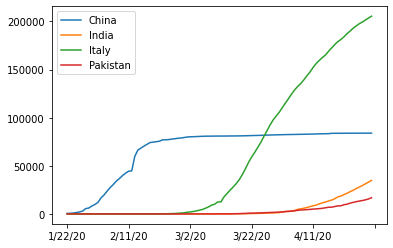

In [14]:
covid_dataset_aggregated.loc['China'].plot()
covid_dataset_aggregated.loc['India'].plot()
covid_dataset_aggregated.loc['Italy'].plot()
covid_dataset_aggregated.loc['Pakistan'].plot()
plt.legend()


<AxesSubplot:>

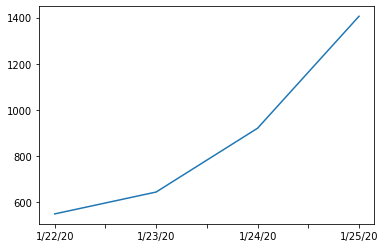

In [16]:
covid_dataset_aggregated.loc['China'][:4].plot()

<AxesSubplot:>

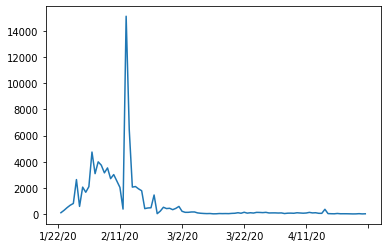

In [18]:
covid_dataset_aggregated.loc['China'].diff().plot()

Maximum Infection Rate for all the countries

In [24]:
countries=list(covid_dataset_aggregated.index)
max_infection_rate=[]
for c in countries:
    max_infection_rate.append(covid_dataset_aggregated.loc[c].diff().max())
covid_dataset_aggregated["max_infection_rates"]=max_infection_rate

In [25]:
covid_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [26]:
covid_dataset_aggregated.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0
Zambia,0,0,0,0,0,0,0,0,0,0,...,74,76,84,84,88,88,95,97,106,9.0
Zimbabwe,0,0,0,0,0,0,0,0,0,0,...,28,28,29,31,31,32,32,32,40,8.0


In [28]:
covid_dataset=pd.DataFrame(covid_dataset_aggregated["max_infection_rates"])

In [33]:
covid_dataset.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


Importing Happiness report dataset

In [34]:
worldwide_happiness_report = pd.read_csv("worldwide_happiness_report.csv")

In [35]:
worldwide_happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [36]:
useless_col = ["Overall rank", "Generosity", "Score", "Perceptions of corruption"]

In [37]:
worldwide_happiness_report.drop(useless_col, axis=1, inplace=True)
worldwide_happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [39]:
worldwide_happiness_report.set_index("Country or region",inplace=True)
worldwide_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Size of Covid Dataset

In [40]:
covid_dataset.shape

(187, 1)

Size of World Happiness Dataset

In [43]:
worldwide_happiness_report.shape

(156, 4)

In [45]:
data=covid_dataset.join(worldwide_happiness_report, how="inner")
data.head(15)

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
Australia,497.0,1.372,1.548,1.036,0.557
Austria,1321.0,1.376,1.475,1.016,0.532
Azerbaijan,105.0,1.043,1.147,0.769,0.351
Bahrain,301.0,1.362,1.368,0.871,0.536
Bangladesh,641.0,0.562,0.928,0.723,0.527


Correlation Matrix

In [46]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<AxesSubplot:>

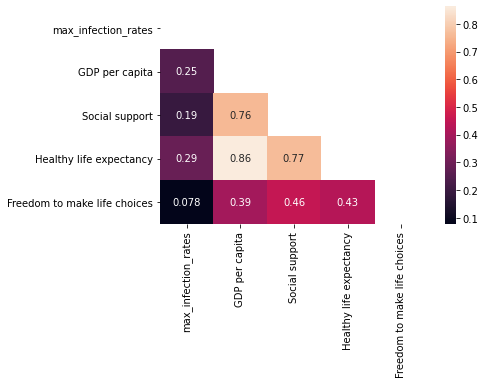

In [47]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(),annot=True, mask=matrix)

Result Visualization

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rates'>

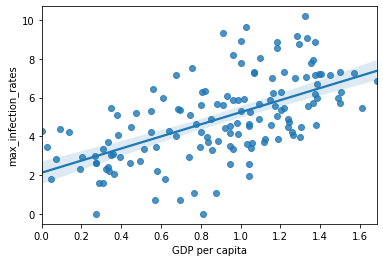

In [55]:
x=data["GDP per capita"]
y=data["max_infection_rates"]
sns.regplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='max_infection_rates'>

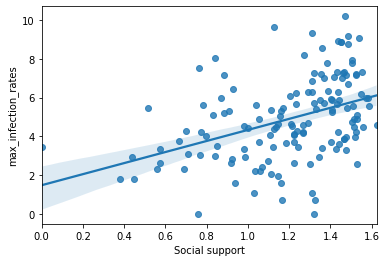

In [56]:
x=data["Social support"]
y=data["max_infection_rates"]
sns.regplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

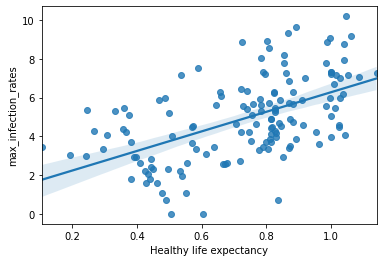

In [58]:
x=data["Healthy life expectancy"]
y=data["max_infection_rates"]
sns.regplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

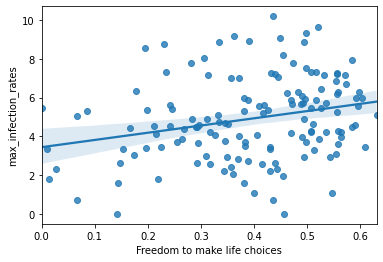

In [60]:
x=data["Freedom to make life choices"]
y=data["max_infection_rates"]
sns.regplot(x=x,y=np.log(y))

Analysis

The analysis shows an interesting result. The people living in developed countries(lesser happiness score) are more prone to get infected by the coronavirus than the ones living in under-developed ones(higher happiness score). But this can be argued by the fact that developed nations have higher testing kits and number, thus more reports. But this can be proven wrong by the analysis on the correlation between the death rate and the happiness score as shown below. Developed countries have a higher death rate as well.

In [62]:
death_data = pd.read_csv("covid19_deaths_dataset.csv")
death_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [64]:
death_data.drop(["Lat","Long"],axis=1,inplace=True)
death_data_aggregated =death_data.groupby("Country/Region").sum()
countrieslist = list(death_data_aggregated.index)
max_death_rates =[]
for c in countrieslist:
    max_death_rates.append(death_data_aggregated.loc[c].diff().max())
death_data_aggregated["max_death_rate"]=max_death_rates
coronadeath_data = pd.DataFrame(death_data_aggregated["max_death_rate"])
coronadeath_data.head()

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [66]:
newdata = coronadeath_data.join(worldwide_happiness_report,how="inner")
newdata.head()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


In [67]:
newdata.corr()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


<AxesSubplot:xlabel='Social support', ylabel='max_death_rate'>

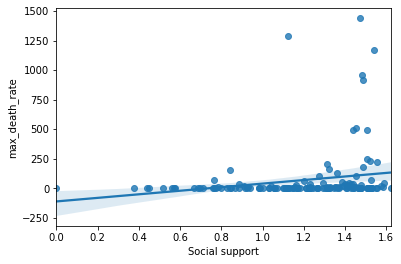

In [68]:
x=newdata["Social support"]
y=newdata["max_death_rate"]
sns.regplot(x=x,y=y)

<AxesSubplot:xlabel='GDP per capita', ylabel='max_death_rate'>

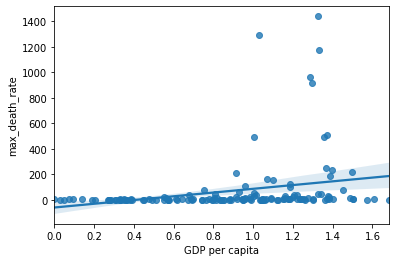

In [69]:
x=newdata["GDP per capita"]
y=newdata["max_death_rate"]
sns.regplot(x=x,y=y)